### Text Clustering with kMeans

### Load Data

In our example below we are using the 20newsgroup dataset that is available in Scikit-learn datasets. This dataset consists article of 20 groups but in our example, we are filtering only for two categories soc.religion.christian and comp.graphics. Lets load dataset for train and test data.

In [1]:
from sklearn.datasets import fetch_20newsgroups

categories = ['soc.religion.christian',
              'comp.graphics']
# Load Data
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Check number of records in training and testing data
len(twenty_train.data),len(twenty_test.data)

(1183, 787)

In [2]:
twenty_test.data[0]

'From: dan@ingres.com (a Rose arose)\nSubject: Re: earthquake prediction\nOrganization: Representing my own views here.\nLines: 75\n\nmserv@mozart.cc.iup.edu (Mail Server) writes:\n: Ok, a few days back, the below-included message was posted stating: \n: \n: >     I believe with everything in my heart that on May 3, 1993, the city of\n: >Portland, Oregon in the country of the United States of America will be hit\n: >with a catastrophic and disastrous earthquake...\n: \n: By now, we know that this did not come to pass....\n: \n: ...I don\'t think it\'s particularly \n: glorifying to God to say things like "Well, I THINK the Lord is telling me...", \n: ..Such statements seem to me to be an attempt to get a spiritual thrill should \n: the guess happen to come true, without risking the guilt of false prophecy \n: should it fail to come to pass.  I do not believe genuine prophecy was ever \n: like this.  Comments?\n: \n\nI agree.   People should not be misled to believe "thus sayeth the Lor

### Generate the features using TF-IDF vectorization

In [3]:
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(twenty_train.data)

# Check Shape of Count Vector
X_train_counts.shape

(1183, 22690)

### perform GMM clustering

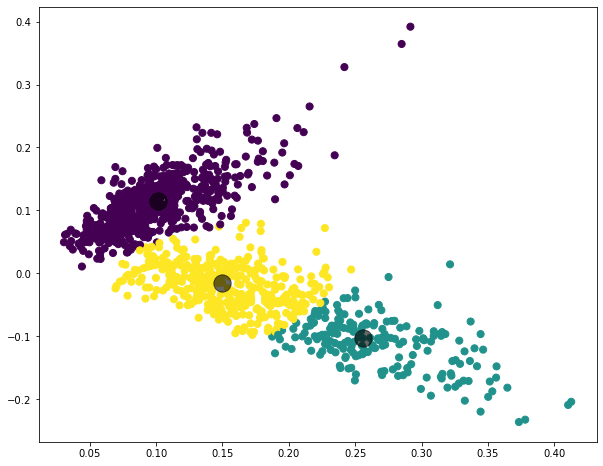

In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import TruncatedSVD
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
import numpy as np

sklearn_pca = TruncatedSVD(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_train_counts)
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(Y_sklearn)
prediction_gmm = gmm.predict(Y_sklearn)
probs = gmm.predict_proba(Y_sklearn)

centers = np.zeros((3,2))
for i in range(3):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

Reference: https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f